# Weekly Dairy Product Prices - Predicting prices




In this notebook I am going to attempt to predict the prices of dairy products in the US. 

## Dataset
I will be using the **[https://www.kaggle.com/sohier/weekly-dairy-product-prices](https://www.kaggle.com/sohier/weekly-dairy-product-prices)** uploaded to Keggle by [@sohier](https://www.kaggle.com/sohier)

In specific I am going to analize the **"40 Pound Block Cheddar Cheese Prices and Sales" data.**

In [1]:
%matplotlib inline
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt

Read the data and move it into a list. Also remove the (** " **) quotes from the data

In [2]:
file_name = 'Datamart-Export_DY_WK100-40 Pound Block Cheddar Cheese Prices and Sales_20170829_122601.csv'
data = []
with open(file_name, 'r') as f:
    data = [i.replace('"', '').split(',') for i in f.read().split('\n')]

In [3]:
data[:3]

[['Week Ending Date', 'Report Date', 'Date', 'Weighted Prices', 'Sales'],
 ['08/19/2017', '08/23/2017', '07/22', '1.5907', '11', '217', '751'],
 ['08/19/2017', '08/23/2017', '07/29', '1.6226', '11', '933', '852']]

In [4]:
data[-3:]

[['03/31/2012', '04/04/2012', '03/10', '1.4926', '9', '904', '507'],
 ['03/31/2012', '04/04/2012', '03/03', '1.4873', '9', '306', '594'],
 ['']]

We need to remove the last row, It is empty.

We also separate the header form the data.

In [5]:
header = data[0]
data = data[1:-1]

We extract the prices and the dates. The dates **Do not have the year**, we need to get it from the Report Date Column

In [6]:
dates = []
years = []
prices = []
for row in data:
    # Next line, gets the column 'Report Date' and takes only the year from it.
    years.append(row[1].split('/')[-1])
    dates.append(row[2])
    prices.append(row[3])

We compleat the format of the dates.

In [7]:
dates = [date + '/' + year for date, year in zip(dates, years)]

In [8]:
dates[-5:]

['03/31/2012', '03/24/2012', '03/17/2012', '03/10/2012', '03/03/2012']

Using the 'datetime' library we conver the data to be used to plot it.

In [9]:
trX = np.array([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates])
trY = np.array([float(i) for i in prices])

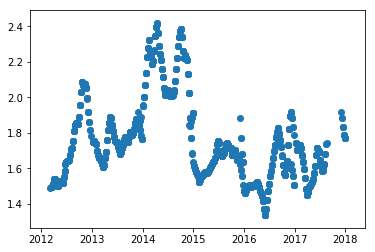

In [10]:
plt.scatter(trX, trY)

## Implementation of Polynomial Regression Regession

Set the hyper-parameters

In [11]:
learning_rate = 0.000025
epochs = 200000

num_coeffs = 8

One more change to the date. **x** has datatime objects, we need them to be a number

In [12]:
trX_i = np.array([i for i in range(1, len(trX)+1)])

# Divide X a bit more and centre on zero
 
trX_i = np.divide(trX_i, 500)
trX_i = trX_i - np.max(trX_i)/2
print(trX_i)

[-1.408 -1.406 -1.404 ...,  1.406  1.408  1.41 ]


In [13]:
# trX = [(i-dt.date(2010,1,1)).total_seconds() for i in trX]

In [14]:
trY_i = trY
print(trY_i)

[ 1.5907  1.6226  1.6822 ...,  1.4955  1.4926  1.4873]


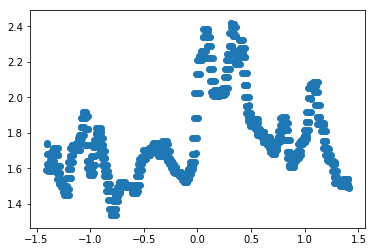

In [15]:
plt.scatter(trX_i, trY_i)

We define the placeholder for the model

In [16]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

We define the Model

In [17]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

Set up the parameter vector to zeros

In [18]:
weitghs = tf.Variable(tf.truncated_normal((num_coeffs,), mean=0.0, stddev=0.05, name='parameters'))

In [19]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     w_val = sess.run(weitghs)
#     print(w_val) 

In [20]:
# weitghs = tf.Variable([0.] * num_coeffs, name='parameters')
y_model = model(X, weitghs)

We define a simple cost function

In [21]:
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Star the session, initialize the variables and run the trainig algorithm

In [22]:
%%time
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(epochs):
#         for (x,y) in zip(trX_i, trY_i):
        _, c = sess.run([train_op, cost], feed_dict={X: trX_i, Y:trY_i})
        w_val = sess.run(weitghs)
        if epoch % 20000 == 0:  
            print("Epoch: {}, Cost: {}".format(epoch, c))
            print(w_val)
            
            
            
#     w_val = sess.run(weitghs)
    print(w_val)

Epoch: 0, Cost: 4239.6201171875
[ 0.11586189  0.07908911  0.10426807  0.06403776  0.08837347  0.00216651
  0.14670402 -0.04700135]
Epoch: 20000, Cost: 31.782737731933594
[ 1.95397675  0.72730589 -1.01140034 -1.47110093  1.16409099  1.0742991
 -0.39610913 -0.2696974 ]
Epoch: 40000, Cost: 30.006851196289062
[ 1.9616977   0.87479079 -1.08152425 -2.07748652  1.26168239  1.70708704
 -0.43025964 -0.45902702]
Epoch: 60000, Cost: 29.61844253540039
[ 1.96219373  0.94464982 -1.08589315 -2.36482811  1.26753831  2.00704598
 -0.43222708 -0.54880458]
Epoch: 80000, Cost: 29.531108856201172
[ 1.96221089  0.97776991 -1.08595884 -2.50106072  1.26750064  2.14927149
 -0.43216807 -0.59137577]
Epoch: 100000, Cost: 29.511449813842773
[ 1.96221793  0.99345613 -1.08595884 -2.56559253  1.26742554  2.21664762
 -0.43211713 -0.61154401]
Epoch: 120000, Cost: 29.50700569152832
[ 1.96222079  1.00090885 -1.08595443 -2.59626341  1.26738417  2.24866962
 -0.43209106 -0.62112874]
Epoch: 140000, Cost: 29.506004333496094
[ 

In [25]:
w_val

array([ 1.96222079,  1.00698292, -1.0859158 , -2.6212194 ,  1.26729953,
        2.27470636, -0.43205181, -0.62891871], dtype=float32)

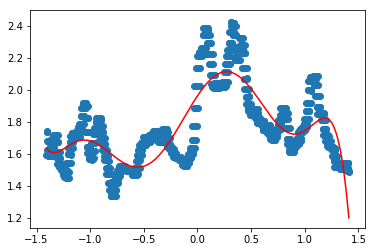

In [26]:
plt.scatter(trX_i, trY_i)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX_i, i)

plt.plot(trX_i, trY2, 'r')
